<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.656265,60.778016,63.143605,-1.250803,159.327083,160.401479,-1.074396
1,0.0,1.0,40.554300,98.537631,84.561515,-1.119483,232.533963,233.407451,-0.873488
2,0.0,2.0,40.853121,66.697786,61.806026,-0.350376,179.006556,179.267857,-0.261301
3,0.0,3.0,95.760576,87.496756,67.226014,0.974627,261.457973,260.702568,0.755405
4,0.0,4.0,83.798490,67.139156,70.711096,1.971120,233.619862,231.825367,1.794494
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,69.332633,37.635862,21.290418,0.292302,138.551215,138.371087,0.180128
119996,999.0,116.0,73.017739,26.387378,47.839267,-0.253495,156.990888,157.347201,-0.356312
119997,999.0,117.0,99.976967,41.807065,55.330954,0.608211,207.723197,207.421480,0.301717
119998,999.0,118.0,48.677687,40.131587,96.130772,-2.142562,192.797485,194.894380,-2.096895


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    26.656265  60.778016  63.143605 -1.250803  159.327083   
      1.0    40.554300  98.537631  84.561515 -1.119483  232.533963   
      2.0    40.853121  66.697786  61.806026 -0.350376  179.006556   
      3.0    95.760576  87.496756  67.226014  0.974627  261.457973   
      4.0    83.798490  67.139156  70.711096  1.971120  233.619862   
...                ...        ...        ...       ...         ...   
999.0 115.0  69.332633  37.635862  21.290418  0.292302  138.551215   
      116.0  73.017739  26.387378  47.839267 -0.253495  156.990888   
      117.0  99.976967  41.807065  55.330954  0.608211  207.723197   
      118.0  48.677687  40.131587  96.130772 -2.142562  192.797485   
      119.0  72.867905  81.227729  85.730608 -0.267877  249.558365   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    160.401479 -1.074396  
      1.0    233.407451 -0.873488  
      2.0    179.267857 -0.261301  
      3.0    260.702568  0.755405  
      4.0    231.825367  1.794494  
...                 ...       ...  
999.0 115.0  138.371087  0.180128  
      116.0  157.347201 -0.356312  
      117.0  207.421480  0.301717  
      118.0  194.894380 -2.096895  
      119.0  250.025758 -0.467393  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    26.656265  60.778016  63.143605 -1.250803  159.327083   
      1.0    40.554300  98.537631  84.561515 -1.119483  232.533963   
      2.0    40.853121  66.697786  61.806026 -0.350376  179.006556   
      3.0    95.760576  87.496756  67.226014  0.974627  261.457973   
      4.0    83.798490  67.139156  70.711096  1.971120  233.619862   
...                ...        ...        ...       ...         ...   
999.0 115.0  69.332633  37.635862  21.290418  0.292302  138.551215   
      116.0  73.017739  26.387378  47.839267 -0.253495  156.990888   
      117.0  99.976967  41.807065  55.330954  0.608211  207.723197   
      118.0  48.677687  40.131587  96.130772 -2.142562  192.797485   
      119.0  72.867905  81.227729  85.730608 -0.267877  249.558365   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    160.401479 -1.074396  
      1.0    233.407451 -0.873488  
      2.0    179.267857 -0.261301  
      3.0    260.702568  0.755405  
      4.0    231.825367  1.794494  
...                 ...       ...  
999.0 115.0  138.371087  0.180128  
      116.0  157.347201 -0.356312  
      117.0  207.421480  0.301717  
      118.0  194.894380 -2.096895  
      119.0  250.025758 -0.467393  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.656265,60.778016,63.143605,-1.250803,159.327083,160.401479,-1.074396
1,0.0,1.0,40.554300,98.537631,84.561515,-1.119483,232.533963,233.407451,-0.873488
2,0.0,2.0,40.853121,66.697786,61.806026,-0.350376,179.006556,179.267857,-0.261301
3,0.0,3.0,95.760576,87.496756,67.226014,0.974627,261.457973,260.702568,0.755405
4,0.0,4.0,83.798490,67.139156,70.711096,1.971120,233.619862,231.825367,1.794494
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,69.332633,37.635862,21.290418,0.292302,138.551215,138.371087,0.180128
119996,999.0,116.0,73.017739,26.387378,47.839267,-0.253495,156.990888,157.347201,-0.356312
119997,999.0,117.0,99.976967,41.807065,55.330954,0.608211,207.723197,207.421480,0.301717
119998,999.0,118.0,48.677687,40.131587,96.130772,-2.142562,192.797485,194.894380,-2.096895


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    26.656265  60.778016  63.143605 -1.250803  159.327083   
      1.0    40.554300  98.537631  84.561515 -1.119483  232.533963   
      2.0    40.853121  66.697786  61.806026 -0.350376  179.006556   
      3.0    95.760576  87.496756  67.226014  0.974627  261.457973   
      4.0    83.798490  67.139156  70.711096  1.971120  233.619862   
...                ...        ...        ...       ...         ...   
999.0 115.0  69.332633  37.635862  21.290418  0.292302  138.551215   
      116.0  73.017739  26.387378  47.839267 -0.253495  156.990888   
      117.0  99.976967  41.807065  55.330954  0.608211  207.723197   
      118.0  48.677687  40.131587  96.130772 -2.142562  192.797485   
      119.0  72.867905  81.227729  85.730608 -0.267877  249.558365   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    160.401479 -1.074396  
      1.0    233.407451 -0.873488  
      2.0    179.267857 -0.261301  
      3.0    260.702568  0.755405  
      4.0    231.825367  1.794494  
...                 ...       ...  
999.0 115.0  138.371087  0.180128  
      116.0  157.347201 -0.356312  
      117.0  207.421480  0.301717  
      118.0  194.894380 -2.096895  
      119.0  250.025758 -0.467393  

[120000 rows x 7 columns]

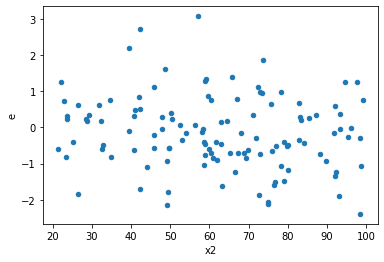

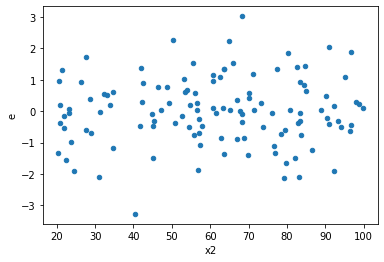

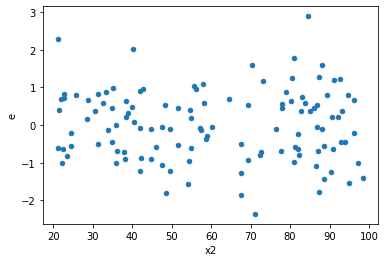

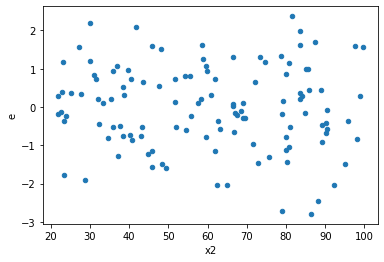

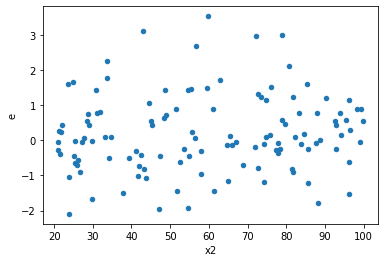

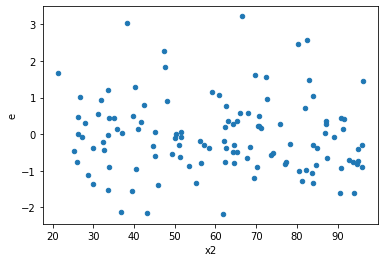

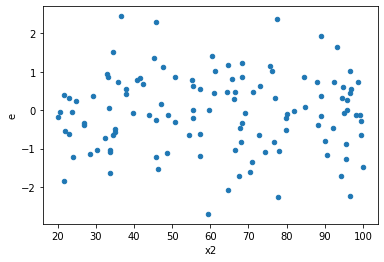

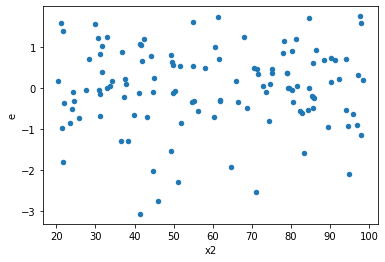

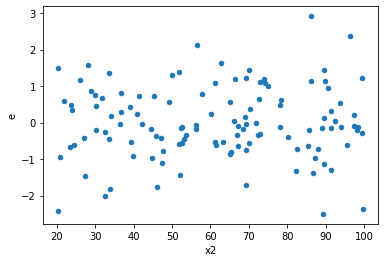

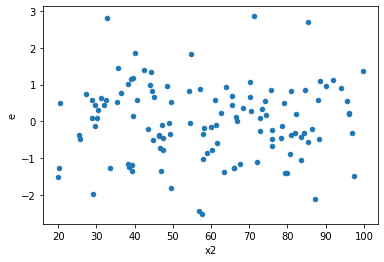

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,49.0,65.0,59.18455689397444,81.89541868815083,1.2078480998770293,1.2599295182792434,1.0431191789824534,0.8651792834782133,0.5674103582608934,0.43258964173910663,Reject005=1 : Homoscedasticity
1.0,59.0,55.0,44.45301047072121,57.07809163046678,0.7534408554359527,1.037783484190305,1.3773921027813487,0.23216863147428968,0.8839156842628552,0.11608431573714484,Reject005=1 : Homoscedasticity
2.0,61.0,53.0,65.74344505752359,75.03540557103915,1.0777613943856326,1.4157623692648895,1.3136139192218248,0.31169758778618206,0.844151206106909,0.15584879389309103,Reject005=1 : Homoscedasticity
5.0,56.0,58.0,39.42479117044936,72.0871182701617,0.7040141280437385,1.2428813494855464,1.765421033437456,0.033431432269297456,0.9832842838653513,0.016715716134648728,Reject005=0 : Heteroscedasticity
7.0,61.0,53.0,45.178577762212896,44.11551402188373,0.740632422331359,0.8323681890921459,1.1238613973609495,0.6665868080048054,0.6667065959975973,0.3332934040024027,Reject005=1 : Homoscedasticity
8.0,48.0,66.0,29.818548785818273,58.96126806666004,0.621219766371214,0.8933525464645461,1.4380620109417404,0.17016934020163288,0.9149153298991836,0.08508467010081644,Reject005=1 : Homoscedasticity
9.0,73.0,41.0,56.07482073468176,45.401165649669544,0.7681482292422158,1.1073455036504767,1.4415778901721632,0.20482444713426418,0.8975877764328679,0.10241222356713209,Reject005=1 : Homoscedasticity
10.0,52.0,62.0,46.004557250660206,65.04751103469276,0.8847030240511577,1.0491534037853671,1.185882013809755,0.517450242590558,0.741274878704721,0.258725121295279,Reject005=1 : Homoscedasticity
11.0,46.0,68.0,44.120139142173144,82.76044506580642,0.9591334596124597,1.2170653686148003,1.268921813140122,0.36737795326519196,0.816311023367404,0.18368897663259598,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,49.0,65.0,59.18455689397444,81.89541868815083,1.2078480998770293,1.2599295182792434,1.0431191789824534,0.8651792834782133,Reject005=1 : Homoscedasticity
1.0,59.0,55.0,44.45301047072121,57.07809163046678,0.7534408554359527,1.037783484190305,1.3773921027813487,0.23216863147428968,Reject005=1 : Homoscedasticity
2.0,61.0,53.0,65.74344505752359,75.03540557103915,1.0777613943856326,1.4157623692648895,1.3136139192218248,0.31169758778618206,Reject005=1 : Homoscedasticity
3.0,43.0,71.0,44.869305959688255,60.993477483955395,1.043472231620657,0.8590630631543014,0.8232735257555032,0.4965780211645137,Reject005=1 : Homoscedasticity
4.0,48.0,66.0,51.71114862369216,53.926640287337534,1.07731559632692,0.8170703073839021,0.7584317076348679,0.31584747156833176,Reject005=1 : Homoscedasticity
5.0,56.0,58.0,39.42479117044936,72.0871182701617,0.7040141280437385,1.2428813494855464,1.765421033437456,0.033431432269297456,Reject005=0 : Heteroscedasticity
6.0,54.0,60.0,59.78329077162375,59.45318488484602,1.1070979772522915,0.9908864147474337,0.8950304626214894,0.6810417514350231,Reject005=1 : Homoscedasticity
7.0,61.0,53.0,45.178577762212896,44.11551402188373,0.740632422331359,0.8323681890921459,1.1238613973609495,0.6665868080048054,Reject005=1 : Homoscedasticity
8.0,48.0,66.0,29.818548785818273,58.96126806666004,0.621219766371214,0.8933525464645461,1.4380620109417404,0.17016934020163288,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      934
Reject005=0 : Heteroscedasticity     66
Name: Result_test, dtype: int64